In [443]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import numpy as np
import seaborn as sns
import scipy.stats as st
from statsmodels.tsa.statespace.sarimax import *
import statsmodels.api as sm

In [444]:
data_2024 = pd.read_csv("2024_PA13.csv")
data_2023 = pd.read_csv("2023_PA13.csv")

In [445]:
print(data_2024.head())
print(data_2023.head())

  Unnamed: 0         PA13:NO2           PA13:NO        PA13:NOX      PA13:O3  \
0        NaN      PARIS 13ème       PARIS 13ème     PARIS 13ème  PARIS 13ème   
1        NaN             PA13              PA13            PA13         PA13   
2        NaN  dioxyde d azote  monoxyde d azote  oxydes d azote        ozone   
3        NaN              NO2                NO             NOX           O3   
4        NaN        microg/m3         microg/m3       microg/m3    microg/m3   

   OBJECTID  
0         0  
1         1  
2         2  
3         3  
4         4  
  Unnamed: 0         PA13:NO2           PA13:NO        PA13:NOX      PA13:O3  \
0        NaN      PARIS 13ème       PARIS 13ème     PARIS 13ème  PARIS 13ème   
1        NaN             PA13              PA13            PA13         PA13   
2        NaN  dioxyde d azote  monoxyde d azote  oxydes d azote        ozone   
3        NaN              NO2                NO             NOX           O3   
4        NaN        microg/m3      

In [446]:
print(data_2023.isna().sum())
print(data_2024.isna().sum())

Unnamed: 0      5
PA13:NO2      721
PA13:NO       721
PA13:NOX      721
PA13:O3        15
OBJECTID        0
dtype: int64
Unnamed: 0     5
PA13:NO2      27
PA13:NO       27
PA13:NOX      27
PA13:O3        9
OBJECTID       0
dtype: int64


In [447]:
data_2024.dropna(inplace=True)
data_2023.dropna(inplace=True)

In [448]:
data_2024[data_2024.duplicated()]

,Unnamed: 0,PA13:NO2,PA13:NO,PA13:NOX,PA13:O3,OBJECTID


In [449]:
data_2023[data_2023.duplicated()]

,Unnamed: 0,PA13:NO2,PA13:NO,PA13:NOX,PA13:O3,OBJECTID


In [450]:
data_2023.describe(include = 'all')

,Unnamed: 0,PA13:NO2,PA13:NO,PA13:NOX,PA13:O3,OBJECTID
count,8039,8039,8039,8039,8039,8039.000000
unique,8039,716,449,1006,1250,NaN
top,2023/01/01 01:00:00+00,7.5,0.6,12,67,NaN
freq,1,52,523,54,26,NaN
mean,NaN,NaN,NaN,NaN,NaN,4165.085707
std,NaN,NaN,NaN,NaN,NaN,2501.442281
min,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,2017.500000
50%,NaN,NaN,NaN,NaN,NaN,4030.000000
75%,NaN,NaN,NaN,NaN,NaN,6341.500000


In [451]:
data_2024.describe(include = 'all')

,Unnamed: 0,PA13:NO2,PA13:NO,PA13:NOX,PA13:O3,OBJECTID
count,2924,2924,2924,2924,2924,2924.000000
unique,2924,547,273,684,835,NaN
top,2024/01/01 01:00:00+00,16.1,0.8,10.6,64.5,NaN
freq,1,21,156,25,14,NaN
mean,NaN,NaN,NaN,NaN,NaN,1480.919973
std,NaN,NaN,NaN,NaN,NaN,854.202771
min,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,737.750000
50%,NaN,NaN,NaN,NaN,NaN,1484.500000
75%,NaN,NaN,NaN,NaN,NaN,2222.250000


In [452]:
print(data_2024.info())
print(data_2023.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2924 entries, 5 to 2953
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2924 non-null   object
 1   PA13:NO2    2924 non-null   object
 2   PA13:NO     2924 non-null   object
 3   PA13:NOX    2924 non-null   object
 4   PA13:O3     2924 non-null   object
 5   OBJECTID    2924 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 159.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 8039 entries, 5 to 8764
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8039 non-null   object
 1   PA13:NO2    8039 non-null   object
 2   PA13:NO     8039 non-null   object
 3   PA13:NOX    8039 non-null   object
 4   PA13:O3     8039 non-null   object
 5   OBJECTID    8039 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 439.6+ KB
None


In [453]:
data_2024.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
data_2023.rename(columns={"Unnamed: 0": "Date"}, inplace=True)

In [454]:
data_2024['Date'] = pd.to_datetime(data_2024['Date'])
print(data_2024.info())
data_2023['Date'] = pd.to_datetime(data_2023['Date'])
print(data_2023.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2924 entries, 5 to 2953
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Date      2924 non-null   datetime64[ns, UTC]
 1   PA13:NO2  2924 non-null   object             
 2   PA13:NO   2924 non-null   object             
 3   PA13:NOX  2924 non-null   object             
 4   PA13:O3   2924 non-null   object             
 5   OBJECTID  2924 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 159.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 8039 entries, 5 to 8764
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Date      8039 non-null   datetime64[ns, UTC]
 1   PA13:NO2  8039 non-null   object             
 2   PA13:NO   8039 non-null   object             
 3   PA13:NOX  8039 non-null   object             
 4 

In [455]:
data_2024.drop(['OBJECTID'], axis=1, inplace=True)
data_2023.drop(['OBJECTID'], axis=1, inplace=True)

In [456]:
data_2024.set_index('Date', inplace=True)
data_2023.set_index('Date', inplace=True)
data24 = data_2024.astype('float')
data23 = data_2023.astype('float')
data24_resample = data24.resample('D').mean()
data23_resample = data23.resample('D').mean()

In [457]:
print(data24_resample)
print(data23_resample)

                            PA13:NO2   PA13:NO   PA13:NOX    PA13:O3
Date                                                                
2024-01-01 00:00:00+00:00  11.000000  0.956522  12.491304  54.608696
2024-01-02 00:00:00+00:00   8.175000  0.937500   9.633333  58.720833
2024-01-03 00:00:00+00:00  10.933333  1.041667  12.525000  63.962500
2024-01-04 00:00:00+00:00  18.304167  1.816667  21.100000  50.712500
2024-01-05 00:00:00+00:00  19.608333  1.470833  21.866667  48.870833
...                              ...       ...        ...        ...
2024-04-28 00:00:00+00:00  10.137500  0.725000  11.262500  72.366667
2024-04-29 00:00:00+00:00  20.850000  4.633333  27.975000  54.116667
2024-04-30 00:00:00+00:00  16.041667  1.366667  18.125000  57.204167
2024-05-01 00:00:00+00:00  12.245833  1.075000  13.895833  62.500000
2024-05-02 00:00:00+00:00  11.468182  0.754545  12.640909  61.445455

[123 rows x 4 columns]
                            PA13:NO2   PA13:NO   PA13:NOX    PA13:O3
Date      

In [458]:
print(data23_resample.isna().sum())
print(data24_resample.isna().sum())

PA13:NO2    25
PA13:NO     25
PA13:NOX    25
PA13:O3     25
dtype: int64
PA13:NO2    0
PA13:NO     0
PA13:NOX    0
PA13:O3     0
dtype: int64


In [459]:
data23_resample.dropna(inplace=True)

<Axes: >

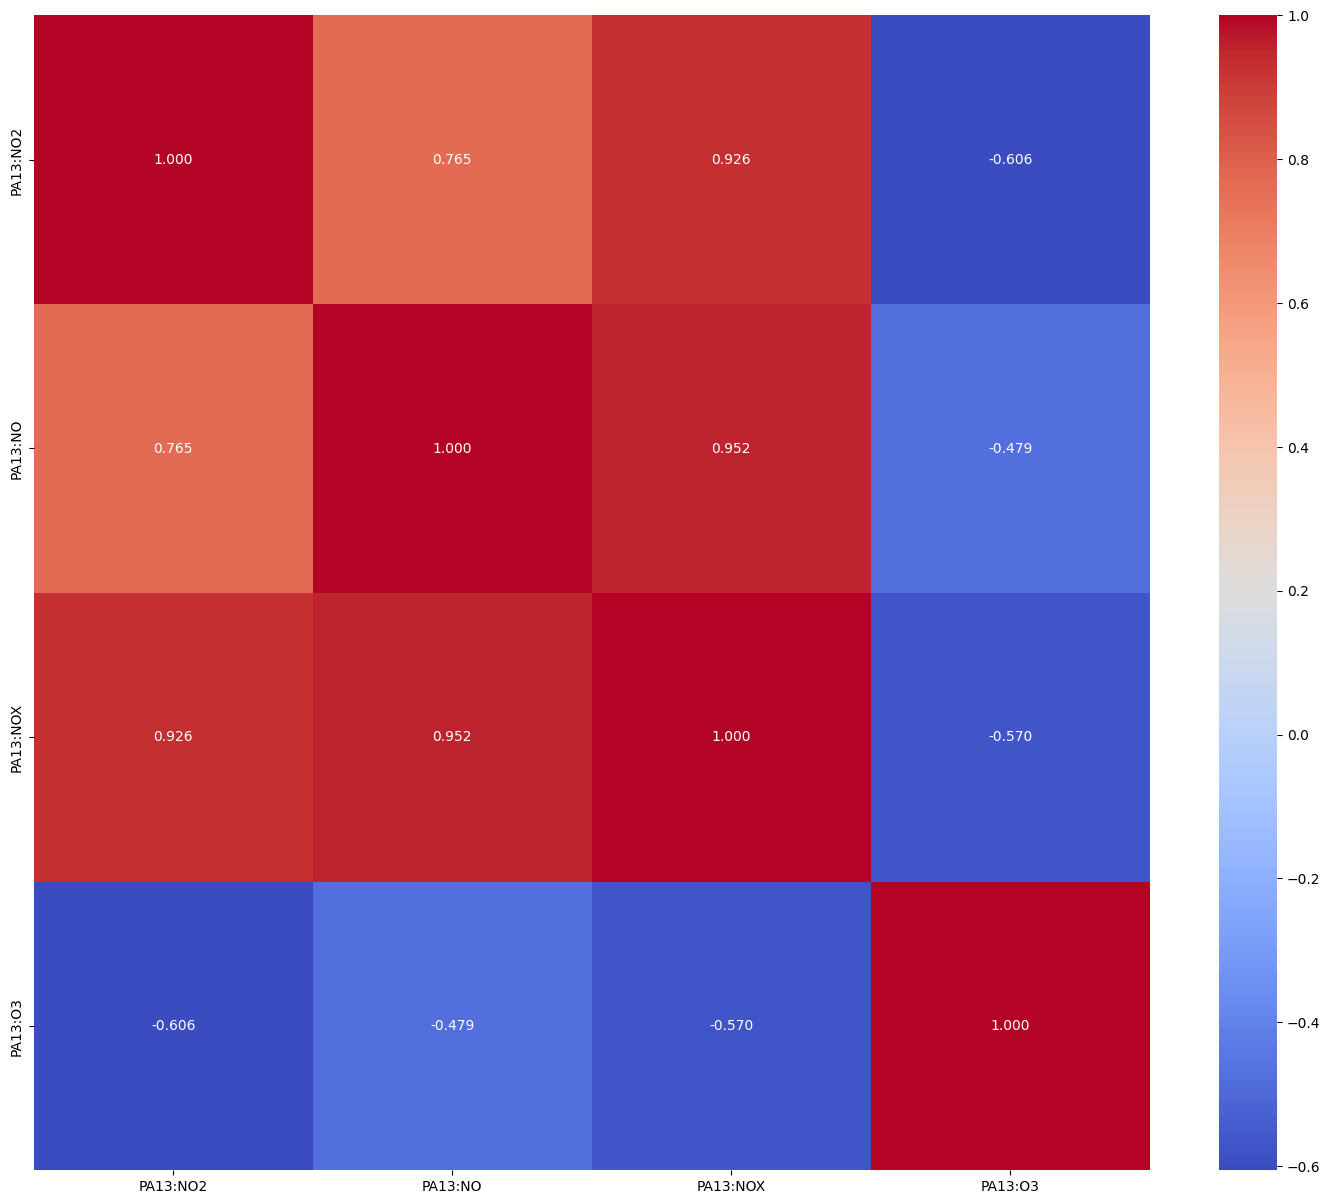

In [460]:
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(data23_resample.corr(),annot=True,fmt="1.3f",cmap='coolwarm')

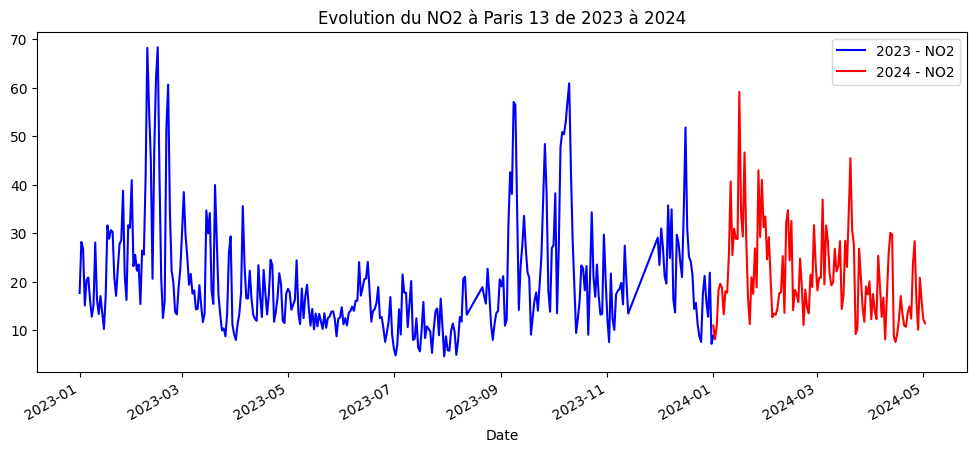

In [461]:
plt.figure(figsize=(12,5))
plt.title("Evolution du NO2 à Paris 13 de 2023 à 2024")
ax1 = data23_resample["PA13:NO2"].plot(color='blue', label='2023 - NO2')
ax2 = data24_resample["PA13:NO2"].plot(color='red', label='2024 - NO2')
plt.legend()
plt.show()

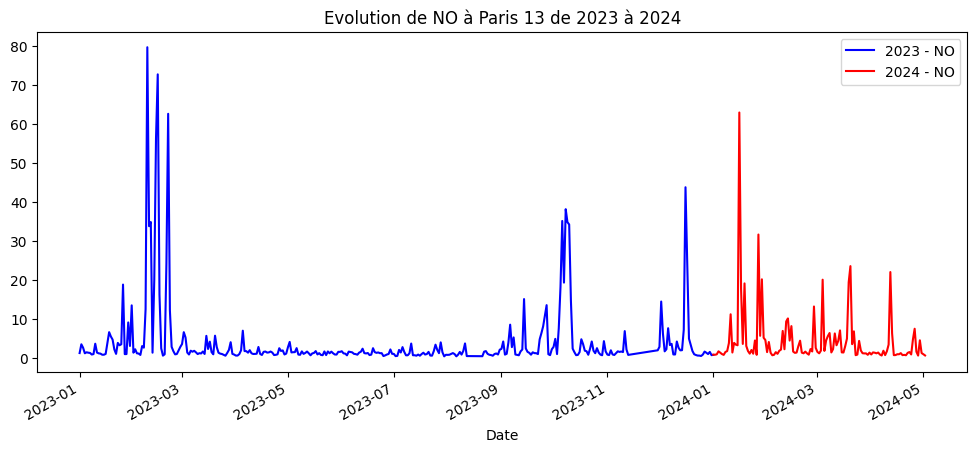

In [462]:
plt.figure(figsize=(12,5))
plt.title("Evolution de NO à Paris 13 de 2023 à 2024")
ax1 = data23_resample["PA13:NO"].plot(color='blue', label='2023 - NO')
ax2 = data24_resample["PA13:NO"].plot(color='red', label='2024 - NO')
plt.legend()
plt.show()

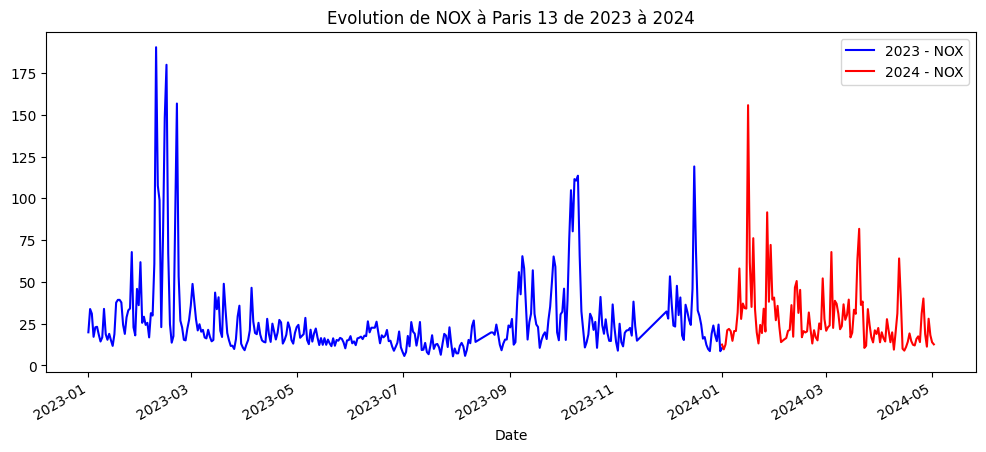

In [463]:
plt.figure(figsize=(12,5))
plt.title("Evolution de NOX à Paris 13 de 2023 à 2024")
ax1 = data23_resample["PA13:NOX"].plot(color='blue', label='2023 - NOX')
ax2 = data24_resample["PA13:NOX"].plot(color='red', label='2024 - NOX')
plt.legend()
plt.show()

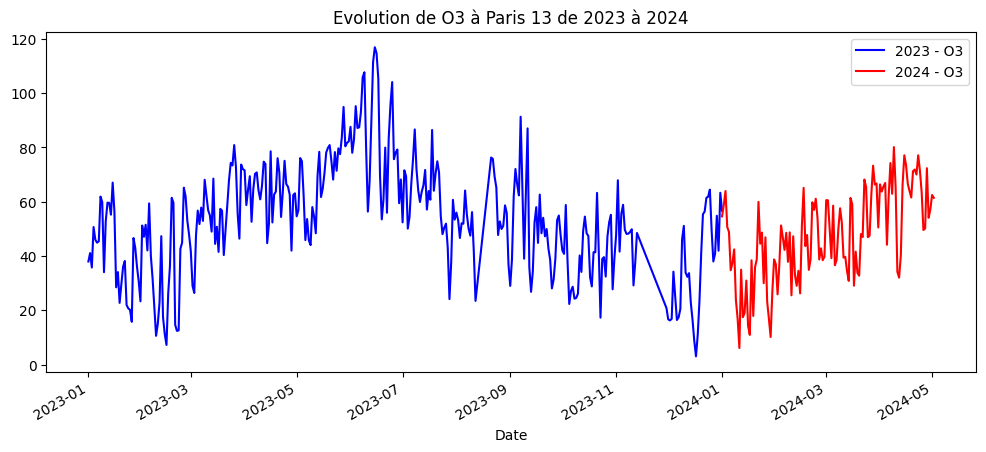

In [464]:
plt.figure(figsize=(12,5))
plt.title("Evolution de O3 à Paris 13 de 2023 à 2024")
ax1 = data23_resample["PA13:O3"].plot(color='blue', label='2023 - O3')
ax2 = data24_resample["PA13:O3"].plot(color='red', label='2024 - O3')
plt.legend()
plt.show()

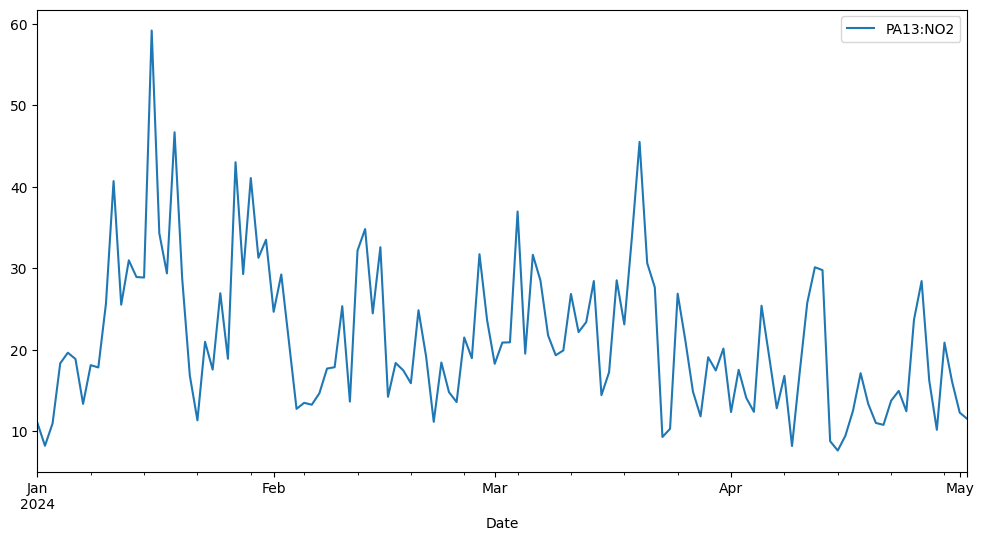

In [465]:
ax = data24_resample.plot(y = 'PA13:NO2', figsize=(12,6))

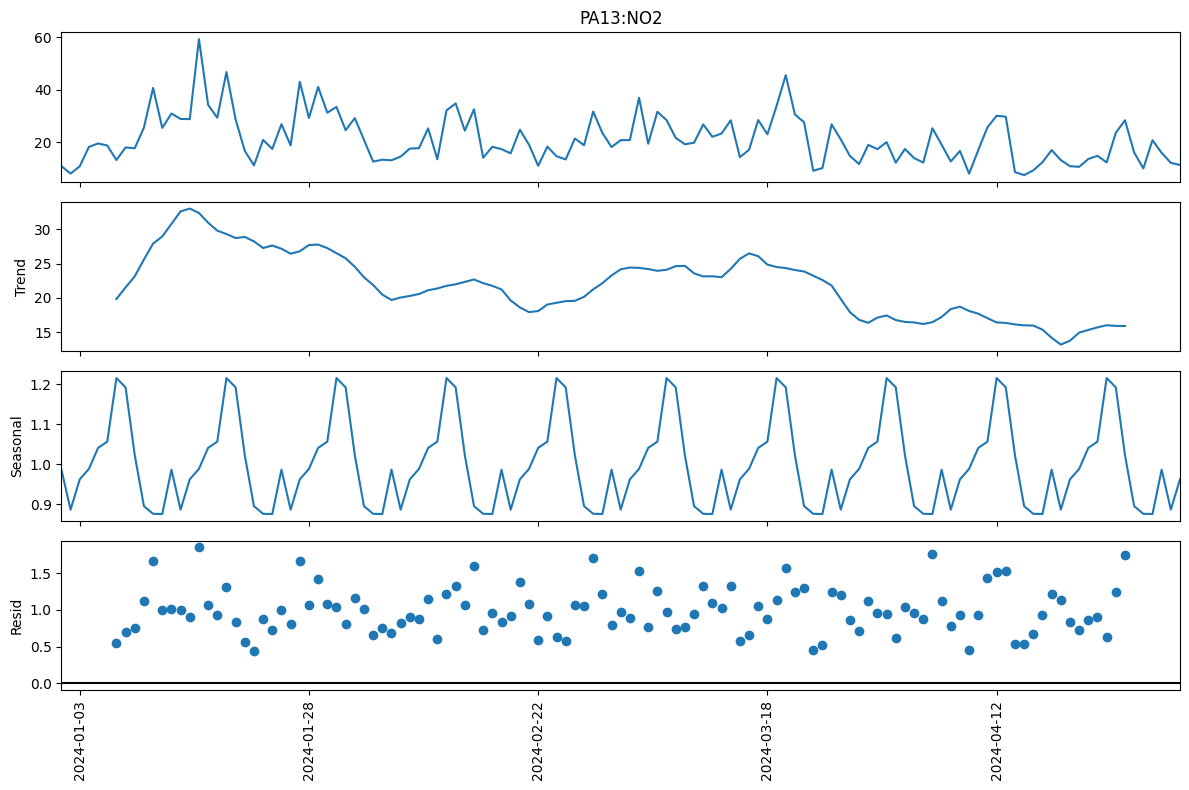

In [466]:
y=data24_resample["PA13:NO2"]
decomposition = seasonal_decompose(y, model='multiplicative', period=12)
fig = decomposition.plot()

fig.set_figwidth(12)
fig.set_figheight(8)

for ax in fig.axes:
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

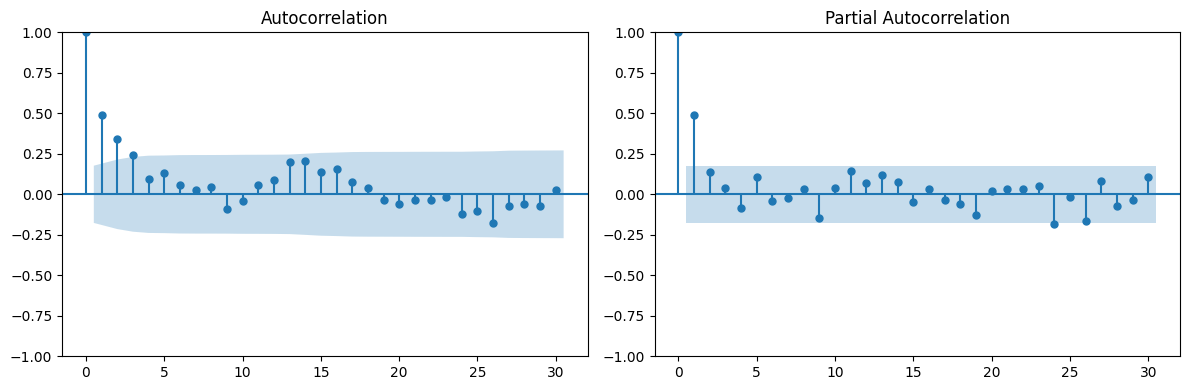

In [467]:
import statsmodels.tsa.api as smt

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(y, lags=30, ax=axes[0])
smt.graphics.plot_pacf(y, lags=30, ax=axes[1])
plt.tight_layout()

In [468]:
result = adfuller(y.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.811434
p-value: 0.000052
Critical Values:
   1%, -3.485585145896754
Critical Values:
   5%, -2.885738566292665
Critical Values:
   10%, -2.5796759080663887


La série chronologique est donc stationnaire : p-value << 0.05

In [469]:
future_exog_dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
future_exog = pd.DataFrame(np.random.normal(0, 1, len(future_exog_dates)), index=future_exog_dates, columns=['exog'])

In [470]:
data23_resample['exog'] = np.random.normal(0, 1, len(data23_resample))
data24_resample['exog'] = np.random.normal(0, 1, len(data24_resample))

In [471]:
exog = data24_resample[['exog']]
model = SARIMAX(y, exog=exog, order=(1, 0, 1))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               PA13:NO2   No. Observations:                  123
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -434.796
Date:                Fri, 17 May 2024   AIC                            877.591
Time:                        14:21:57   BIC                            888.840
Sample:                    01-01-2024   HQIC                           882.161
                         - 05-02-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
exog          -0.1909      0.739     -0.258      0.796      -1.640       1.258
ar.L1          0.9806      0.016     62.400      0.000       0.950       1.011
ma.L1         -0.5223      0.089     -5.868      0.0

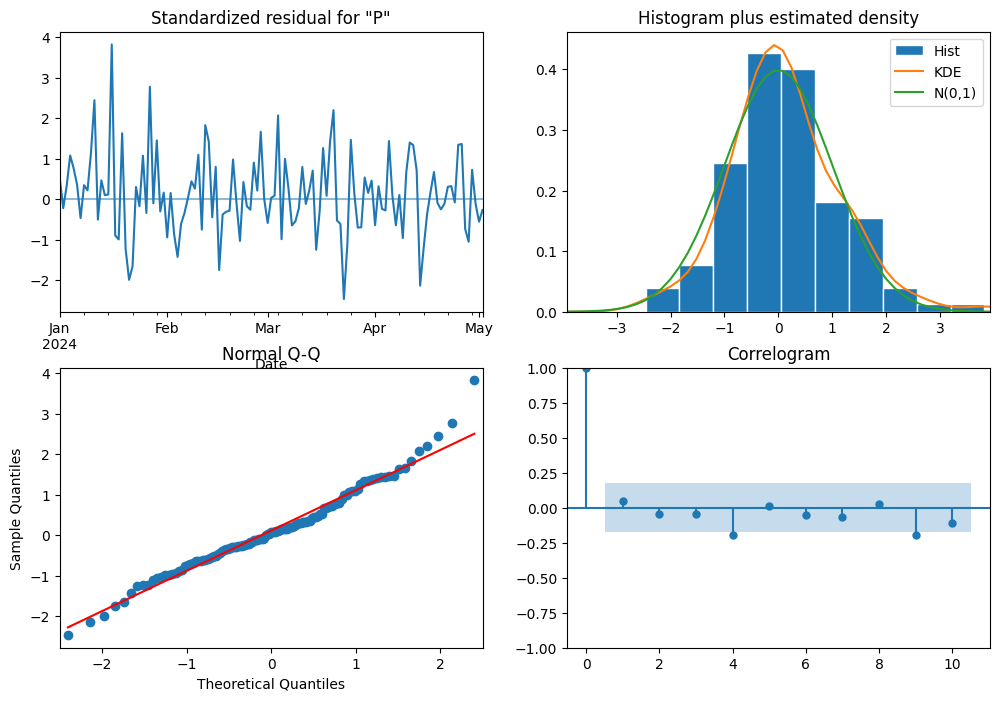

In [472]:
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

In [473]:
forecast = model_fit.get_forecast(steps=len(future_exog), exog=future_exog)
forecast_index = future_exog.index
forecast_df = forecast.conf_int()
forecast_df['forecast'] = forecast.predicted_mean
forecast_df.columns = ['lower PA13:NO2', 'upper PA13:NO2', 'forecast']
forecast_df.index = forecast_index

In [474]:
future_exog = data24_resample[['exog']].iloc[:30]  # Utiliser des exogènes futures
forecast = model_fit.get_forecast(steps=30, exog=future_exog)
forecast_index = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_df = forecast.conf_int()
forecast_df['forecast'] = forecast.predicted_mean
forecast_df.columns = ['lower PA13:NO2', 'upper PA13:NO2', 'forecast']
forecast_df.index = forecast_index

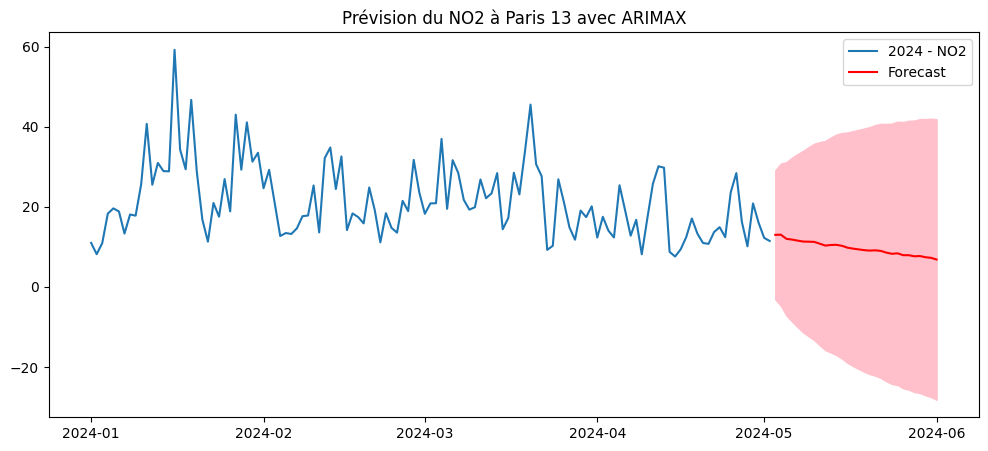

In [475]:
plt.figure(figsize=(12, 5))
plt.plot(y.index, y, label='2024 - NO2')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['lower PA13:NO2'], forecast_df['upper PA13:NO2'], color='pink')
plt.title("Prévision du NO2 à Paris 13 avec ARIMAX")
plt.legend()
plt.show()

In [476]:
# Ajustement du modèle SARIMAX avec différents ordres
model = SARIMAX(y, exog=exog, order=(2, 0, 2), seasonal_order=(2, 1, 2, 12))
model_fit = model.fit(disp=False)
print(model_fit.summary())

C:\Users\Maxim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                           PA13:NO2   No. Observations:                  123
Model:             SARIMAX(2, 0, 2)x(2, 1, 2, 12)   Log Likelihood                -396.608
Date:                            Fri, 17 May 2024   AIC                            813.215
Time:                                    14:22:04   BIC                            840.311
Sample:                                01-01-2024   HQIC                           824.207
                                     - 05-02-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
exog          -0.2140      0.690     -0.310      0.756      -1.566       1.138
ar.L1          0.0320      1.324   

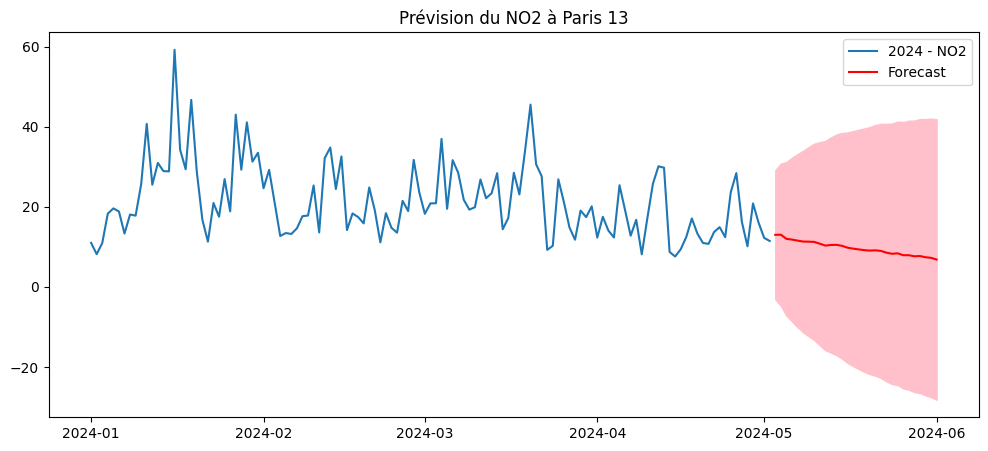

In [477]:
plt.figure(figsize=(12, 5))
plt.plot(y.index, y, label='2024 - NO2')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['lower PA13:NO2'], forecast_df['upper PA13:NO2'], color='pink')
plt.title("Prévision du NO2 à Paris 13")
plt.legend()
plt.show()

In [478]:
# Prédictions
forecast = model_fit.get_forecast(steps=30, exog=future_exog)
forecast_index = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_df = forecast.conf_int()
forecast_df['forecast'] = forecast.predicted_mean
forecast_df.columns = ['lower PA13:NO2', 'upper PA13:NO2', 'forecast']
forecast_df.index = forecast_index

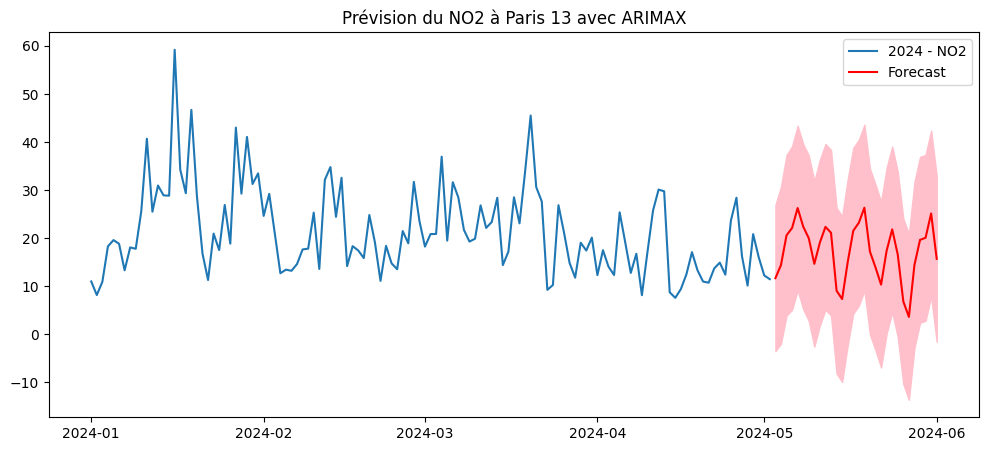

In [479]:
# Visualisation des prédictions
plt.figure(figsize=(12, 5))
plt.plot(y.index, y, label='2024 - NO2')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['lower PA13:NO2'], forecast_df['upper PA13:NO2'], color='pink')
plt.title("Prévision du NO2 à Paris 13 avec ARIMAX")
plt.legend()
plt.show()